In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import kernel
from deflected_subgradient import solveDeflected
from SVR import SVR
from svr_grid_search import Gridsearch
import matplotlib.pyplot as plt
import random
import copy
from sklearn.metrics import r2_score

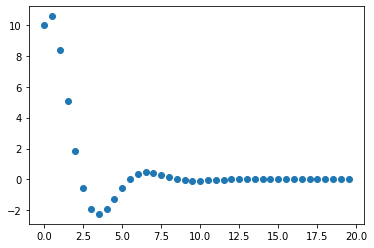

In [78]:
x = np.vstack(np.arange(0,20,0.5))
noising_factor = 0.02
gam = 3
y = np.array([np.exp(-xi/2)*(10*np.cos(xi) + 10*np.sin(xi)) for xi in x])
# y = np.array([ yi + noising_factor * (np.random.rand()*yi) for yi in y])
plt.scatter(x,y)
plt.show()

In [14]:
tr_x, val_x = x[:len(x)-len(x)//5], x[len(x)-len(x)//5:]
tr_y, val_y = y[:len(y)-len(y)//5], y[len(y)-len(y)//5:]
gs = Gridsearch()
gs.set_parameters(
        kernel=["sigmoid", "sigmoid", "sigmoid"],
        kparam=[{"gamma":'auto'},{"gamma":1},{"gamma":2}],
        box=[0.1,1,10],
        eps=[0.05,0.1,0.5],
        optiargs=[{'eps':1e-2, 'max_iter':1e3}, {'eps':5e-3, 'max_iter':1e3}]
    )
best_coarse_model = gs.run(
    tr_x, tr_y, val_x, val_y
)

print("BEST COARSE GRID SEARCH MODEL:",best_coarse_model)

svr = best_coarse_model
kernel, kparam, optiargs, eps, box  = gs.get_model_perturbations(best_coarse_model, 10, 6)
print(kernel, kparam, optiargs)
gs.set_parameters(
    eps=eps,
    box=box,
    kernel=kernel,
    kparam=kparam,
    optiargs=optiargs
)
best_fine_model = gs.run(
    x, y, val_x, val_y
)
print("BEST FINE GRID SEARCH MODEL:", best_fine_model)

svr = best_fine_model
pred = [float(svr.predict(x[i])) for i in range(x.shape[0])]
print("T LOSS:", svr.eps_ins_loss(y, pred))

pred = [float(svr.predict(val_x[i])) for i in range(val_x.shape[0])]
print("V LOSS:", svr.eps_ins_loss(val_y, pred))

(GS - SVR) - Creating models
(GS - SVR) - Fitting 54 models
(GS - SVR) - model 1/54
	(GS - SVR) - Time taken: 40.308433294296265 - Remaining: 2136.346964597702
(GS - SVR) - model 2/54
	(GS - SVR) - Time taken: 81.04148149490356 - Remaining: 2107.0785188674927
(GS - SVR) - model 3/54
	(GS - SVR) - Time taken: 121.67842364311218 - Remaining: 2068.533201932907
(GS - SVR) - model 4/54
	(GS - SVR) - Time taken: 162.126042842865 - Remaining: 2026.5755355358124
(GS - SVR) - model 5/54
	(GS - SVR) - Time taken: 202.31104183197021 - Remaining: 1982.6482099533082
(GS - SVR) - model 6/54
	(GS - SVR) - Time taken: 242.93661427497864 - Remaining: 1943.492914199829
(GS - SVR) - model 7/54
	(GS - SVR) - Time taken: 285.392290353775 - Remaining: 1916.2053780896324
(GS - SVR) - model 8/54
	(GS - SVR) - Time taken: 328.84388613700867 - Remaining: 1890.8523452877998
(GS - SVR) - model 9/54
	(GS - SVR) - Time taken: 371.35314893722534 - Remaining: 1856.7657446861267
(GS - SVR) - model 10/54
	(GS - SVR) - 

(GS - SVR) - Fitting 6 models
(GS - SVR) - model 1/6
	(GS - SVR) - Time taken: 53.68080973625183 - Remaining: 268.40404868125916
(GS - SVR) - model 2/6
	(GS - SVR) - Time taken: 102.83912014961243 - Remaining: 205.67824029922485
(GS - SVR) - model 3/6
	(GS - SVR) - Time taken: 151.44480967521667 - Remaining: 151.44480967521667
(GS - SVR) - model 4/6
	(GS - SVR) - Time taken: 200.06077218055725 - Remaining: 100.03038609027863
(GS - SVR) - model 5/6
	(GS - SVR) - Time taken: 249.04140996932983 - Remaining: 49.80828199386597
(GS - SVR) - model 6/6
	(GS - SVR) - Time taken: 298.03192114830017 - Remaining: 0.0
(GS - SVR) - Evaluating models
(GS - SVR) - SVR: 0 - TR MEE 0.8625261240253905 - VL MEE 0.7065045980366362 - MODEL: 
Kernel: sigmoid
Gamma: 2	Coef: 0
Intercept: [-0.50160648]\Optim_args: {'eps': 0.005, 'max_iter': 1000.0, 'vareps': 0.05}
Box: 0.1

(GS - SVR) - SVR: 1 - TR MEE 0.5000000000000003 - VL MEE 0.9831144488904553 - MODEL: 
Kernel: sigmoid
Gamma: 2	Coef: 0
Intercept: [-0.50278

In [23]:
import time
start = time.time()
svr = SVR("poly", {"gamma": 2, 'coef': 0}, box=1)
svr.fit(x, y, {'eps': 0.007386437591040223, 'vareps': 0.5, 'maxiter': 1e3}, optim_verbose=False)
print(f"elapsed time {time.time() - start}")

elapsed time 5.367005109786987


In [5]:
to_predict = 12
pred = svr.predict(to_predict)
print(f"b: {svr.intercept}")
print(f"Gamma: {svr.gamma_value} - Box: {svr.box}")
print(f'PREDICTION (INPUT = {to_predict})', pred)
pred = [float(svr.predict(np.array([x[i]]))) for i in range(x.size)]
print("LOSS:", svr.eps_ins_loss(y, pred))
plt.scatter(x, y , color="red")
plt.plot(x, pred, color="blue")
plt.title('SVR')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()
r2_score(y, pred)

NameError: name 'svr' is not defined

elapsed time 0.0019736289978027344
 b: [1.21627088]
Gamma: scale - Box: 1.0
PREDICTION (INPUT = 12) [2.73922584]


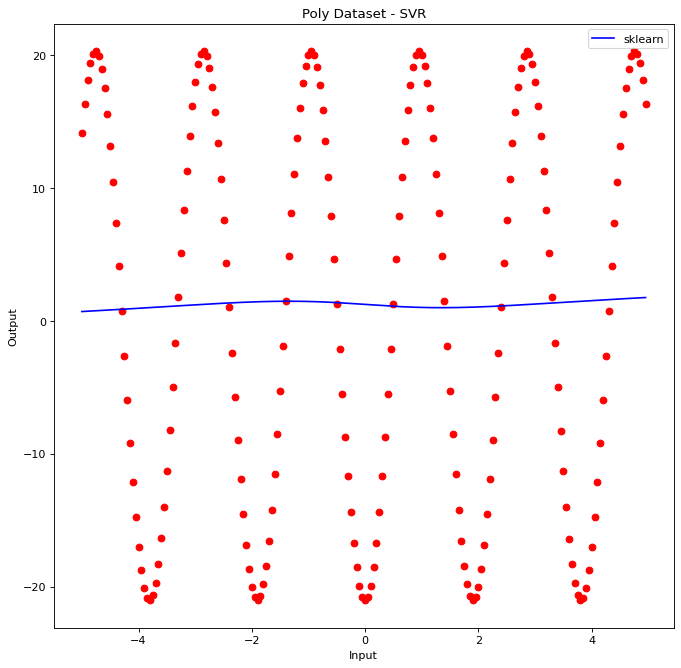

-0.0029000020941654103

In [73]:
import sklearn.svm as ss
import time
start = time.time()
regressor = ss.SVR(kernel = 'sigmoid', gamma='scale')

xs = x
ys = y
regressor.fit(xs, ys.ravel())
print(f"elapsed time {time.time() - start}")
y_pred = regressor.predict(np.array([[to_predict]]))
print(f" b: {regressor.intercept_}")
print(f"Gamma: {regressor.get_params()['gamma']} - Box: {regressor.get_params()['C']}")
print(f'PREDICTION (INPUT = {to_predict})', y_pred)

sklearn_predict = regressor.predict(x)
from matplotlib.pyplot import figure
figure(figsize=(10,10), dpi=80)
plt.scatter(x, y, color = 'red')
plt.plot(x, sklearn_predict, color = 'blue', label='sklearn')
# plt.plot(x, pred, c = 'green', label='our model')
plt.title('Poly Dataset - SVR')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()
r2_score(y, sklearn_predict)

In [ ]:
print("eps:",regressor.epsilon)
print("b:",regressor.intercept_)
params = regressor.get_params()
print("gamma:",params['gamma'])
print("C:",params['C'])
print("sv:",regressor.support_vectors_)
print("supp index:",regressor.support_)

In [ ]:
params["coef0"]

In [ ]:
regressor.dual_coef_